Pembelian
Ya       103
Tidak     97
Name: count, dtype: int64
Jenis_Kelamin              0
Usia                       0
Pendapatan_Bulanan         0
Waktu_di_Situs_per_Hari    0
Jumlah_Produk_Dilihat      0
Pernah_Beli_Sebelumnya     0
Pembelian                  0
dtype: int64


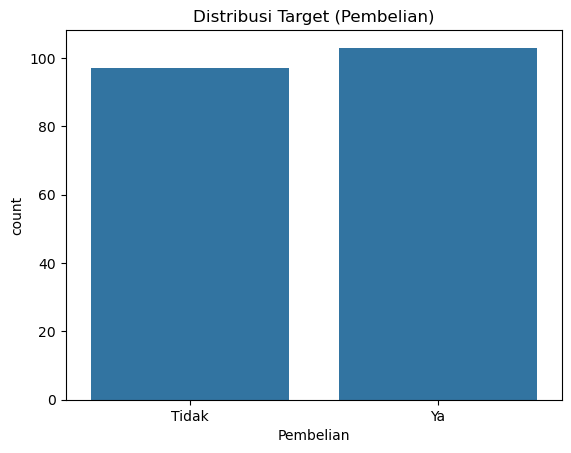

Accuracy: 0.425


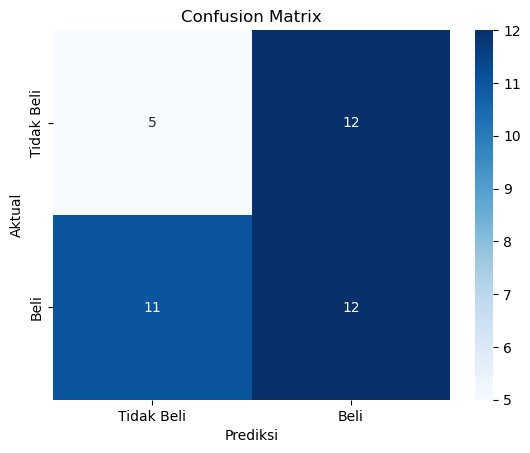

              precision    recall  f1-score   support

           0       0.31      0.29      0.30        17
           1       0.50      0.52      0.51        23

    accuracy                           0.42        40
   macro avg       0.41      0.41      0.41        40
weighted avg       0.42      0.42      0.42        40

Accuracy with threshold 0.4: 0.55


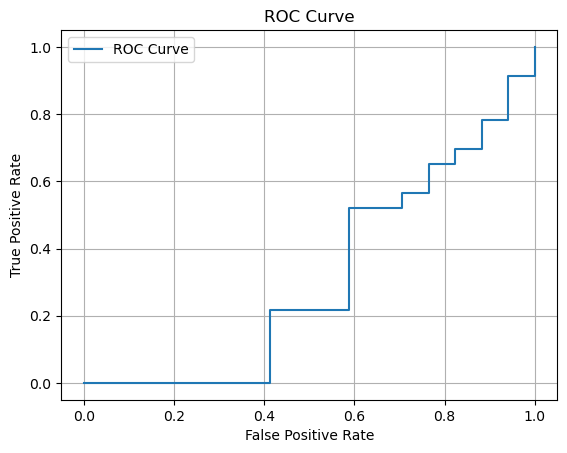

AUC Score: 0.31202046035805625
Cross-validation scores: [0.55  0.475 0.55  0.425 0.575]
Mean CV accuracy: 0.515
Best Parameters: {'C': 0.1}
Best Score: 0.48125


In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# 2. Import dataset
df = pd.read_csv("data_ecommerce_200.csv")

# 3. Exploratory data analysis
print(df['Pembelian'].value_counts())
print(df.isnull().sum())
sns.countplot(data=df, x='Pembelian')
plt.title("Distribusi Target (Pembelian)")
plt.show()

# 4. Preprocessing
# Encode kolom kategorikal
label_encoder = LabelEncoder()
df['Jenis_Kelamin'] = label_encoder.fit_transform(df['Jenis_Kelamin'])  # Pria=1, Wanita=0
df['Pernah_Beli_Sebelumnya'] = label_encoder.fit_transform(df['Pernah_Beli_Sebelumnya'])  # Ya=1, Tidak=0
df['Pembelian'] = label_encoder.fit_transform(df['Pembelian'])  # Ya=1, Tidak=0

# 5. Feature & target split
X = df.drop("Pembelian", axis=1)
y = df["Pembelian"]

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 9. Predict results
y_pred = model.predict(X_test_scaled)

# 10. Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# 11. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Beli', 'Beli'], yticklabels=['Tidak Beli', 'Beli'])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

# 12. Classification report
print(classification_report(y_test, y_pred))

# 13. Threshold adjustment
y_probs = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.4
y_pred_thresh = (y_probs >= threshold).astype(int)
print("Accuracy with threshold 0.4:", accuracy_score(y_test, y_pred_thresh))

# 14. ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_probs))

# 15. Cross-validation
scores = cross_val_score(model, scaler.transform(X), y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

# 16. Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
